### Importing libraries

In [71]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.pipeline import Pipeline
sns.set()
%matplotlib inline

In [72]:
df = pd.read_csv('C:/Users/Jwalit/Desktop/Jason Brownlee ML/Rock type (seismic).csv')

In [73]:
df.head(5)

,Rock Name,Vp(Primary Velocity),Vs(Secondary Velosity),Density
0,Basalt,3.38,1.96,2.15
1,Diabase,5.14,3.10,2.67
2,Fine silty mudstone,3.72,2.33,2.47
3,Oil shale,3.85,2.47,2.42
4,Mudstone,4.78,3.01,2.70


### Basic descriptive analysis

In [74]:
df.dtypes

Rock Name                  object
Vp(Primary Velocity)      float64
Vs(Secondary Velosity)    float64
Density                   float64
dtype: object

In [75]:
df.shape

(39, 4)

In [76]:
#Here we have very limited data for traing the computer using machine learning algorithms

In [77]:
df.isnull().sum()

Rock Name                 0
Vp(Primary Velocity)      0
Vs(Secondary Velosity)    0
Density                   0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
Rock Name                 39 non-null object
Vp(Primary Velocity)      39 non-null float64
Vs(Secondary Velosity)    39 non-null float64
Density                   39 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.3+ KB


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vp(Primary Velocity),39.0,4.704615,0.731573,3.37,4.235,4.78,5.345,5.7
Vs(Secondary Velosity),39.0,2.863846,0.437274,1.95,2.685,3.00,3.125,3.9
Density,39.0,2.443846,0.188563,2.07,2.285,2.48,2.595,2.7


In [80]:
df['Rock Name'].value_counts()

Pelitic dolomite       3
Diabase                3
Siltstone              3
Fine sandstone         3
Oil shale              3
Fine silty mudstone    3
Pebbles sandstone      3
Conglomerate           3
Lime dolomite          3
Silty mudstone         3
Basalt                 3
Pelitic siltstone      3
Mudstone               3
Name: Rock Name, dtype: int64

In [81]:
df.corr()

,Vp(Primary Velocity),Vs(Secondary Velosity),Density
Vp(Primary Velocity),1.000000,0.923939,0.584626
Vs(Secondary Velosity),0.923939,1.000000,0.543344
Density,0.584626,0.543344,1.000000


### Data Visualization

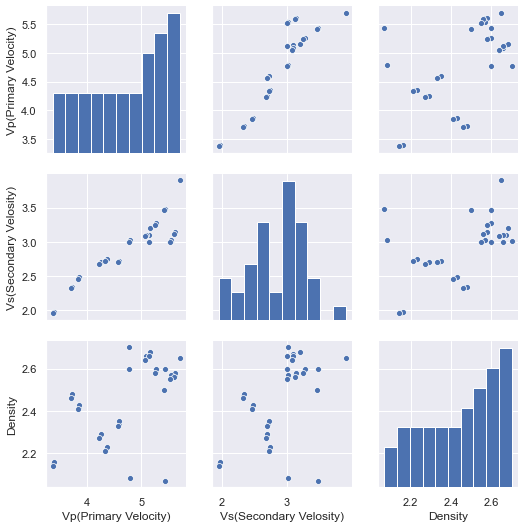

In [82]:
sns.pairplot(df)

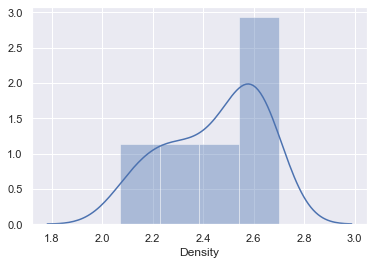

In [83]:
sns.distplot(df['Density'])

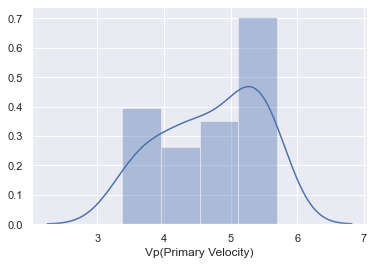

In [84]:
sns.distplot(df['Vp(Primary Velocity)'])

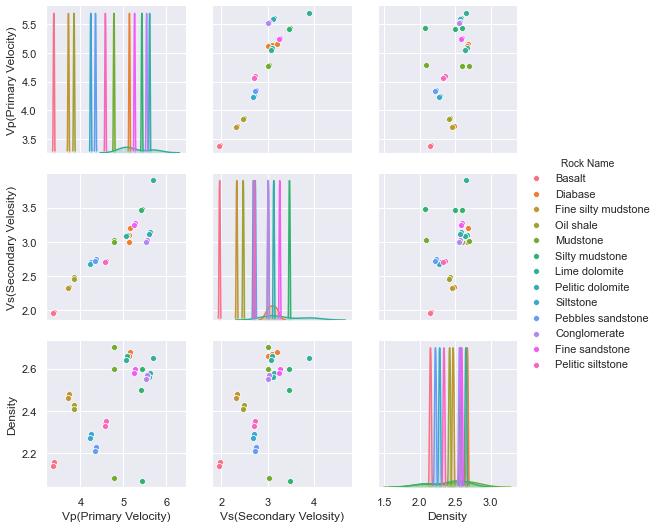

In [85]:
sns.pairplot(df, hue='Rock Name')

### Encoding values of rock name to numeric values

In [86]:
le = LabelEncoder()
label = le.fit_transform(df['Rock Name'])

In [87]:
df.drop(['Rock Name'], axis='columns')

,Vp(Primary Velocity),Vs(Secondary Velosity),Density
0,3.38,1.96,2.15
1,5.14,3.10,2.67
2,3.72,2.33,2.47
3,3.85,2.47,2.42
4,4.78,3.01,2.70
5,5.43,3.47,2.60
6,5.70,3.90,2.65
7,5.61,3.13,2.57
8,4.24,2.69,2.28
9,4.35,2.73,2.22


In [88]:
df['Rock Name'] = label
df.head(3)

,Rock Name,Vp(Primary Velocity),Vs(Secondary Velosity),Density
0,0,3.38,1.96,2.15
1,2,5.14,3.10,2.67
2,4,3.72,2.33,2.47


In [89]:
df['Rock Name'].value_counts()

12    3
11    3
10    3
9     3
8     3
7     3
6     3
5     3
4     3
3     3
2     3
1     3
0     3
Name: Rock Name, dtype: int64

In [90]:
le.classes_

array(['Basalt', 'Conglomerate', 'Diabase', 'Fine sandstone',
       'Fine silty mudstone', 'Lime dolomite', 'Mudstone', 'Oil shale',
       'Pebbles sandstone', 'Pelitic dolomite', 'Pelitic siltstone',
       'Siltstone', 'Silty mudstone'], dtype=object)

In [91]:
df

,Rock Name,Vp(Primary Velocity),Vs(Secondary Velosity),Density
0,0,3.38,1.96,2.15
1,2,5.14,3.10,2.67
2,4,3.72,2.33,2.47
3,7,3.85,2.47,2.42
4,6,4.78,3.01,2.70
5,12,5.43,3.47,2.60
6,5,5.70,3.90,2.65
7,9,5.61,3.13,2.57
8,11,4.24,2.69,2.28
9,8,4.35,2.73,2.22


### Preparing the dataset for train_test_split

In [92]:
X = df[['Vp(Primary Velocity)', 'Vs(Secondary Velosity)', 'Density']]
y = df['Rock Name']

### Splitting the dataset for training and testing

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify=y)

In [94]:
X_train.shape

(26, 3)

In [95]:
y_test.shape

(13,)

### Using KNeighborsClassifier (knn) for prediciton with different K-values

In [96]:
k_values = {}
k=1

while k <= 25:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    performance = metrics.accuracy_score(y_test, predictions)
    k_values[k] = round(performance, 4)
    k += 1

In [97]:
k_values

{1: 1.0,
 2: 0.7692,
 3: 0.7692,
 4: 0.3846,
 5: 0.3846,
 6: 0.3077,
 7: 0.3077,
 8: 0.2308,
 9: 0.1538,
 10: 0.1538,
 11: 0.1538,
 12: 0.1538,
 13: 0.1538,
 14: 0.1538,
 15: 0.1538,
 16: 0.1538,
 17: 0.1538,
 18: 0.1538,
 19: 0.1538,
 20: 0.1538,
 21: 0.1538,
 22: 0.1538,
 23: 0.1538,
 24: 0.1538,
 25: 0.1538}

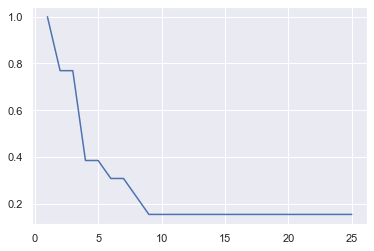

In [98]:
plt.plot(list(k_values.keys()), list(k_values.values()))
plt.show()

### Pipeline module for data preprocessing and model selection

In [99]:
pipeline_dt = Pipeline([('scalar1', StandardScaler()),
                        ('pca1', PCA(n_components=2)),
                        ('dt_classifier', DecisionTreeClassifier())])

In [100]:
pipeline_rf = Pipeline([('scalar1', StandardScaler()),
                        ('pca1', PCA(n_components=2)),
                        ('rf_classifier', RandomForestClassifier())])

In [101]:
pipeline_knn = Pipeline([('scalar1', StandardScaler()),
                        ('pca1', PCA(n_components=2)),
                        ('knn_classifier', KNeighborsClassifier(n_neighbors=1))])

In [102]:
pipeline_lr = Pipeline([('scalar1', StandardScaler()),
                        ('pca1', PCA(n_components=2)),
                        ('lr_classifier', LogisticRegression(random_state=0))])

In [103]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn]

In [104]:
pipe_dict = {0:'logistic regression', 1:'decision tree', 2:'random forest', 3:'Kneighborclassifier'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

C:\Users\Jwalit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jwalit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Jwalit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Model with its accuracy

In [105]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy : {}".format(pipe_dict[i], model.score(X_test, y_test)))

logistic regression Test Accuracy : 0.23076923076923078
decision tree Test Accuracy : 0.7692307692307693
random forest Test Accuracy : 0.7692307692307693
Kneighborclassifier Test Accuracy : 0.8461538461538461
